In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [137]:
cost_mu, cost_sigma = 500, 75

def cost(t):
    return np.random.normal(cost_mu, cost_sigma)

def B(t):
    return cost_mu + cost_sigma*3 *np.sin(2*np.pi/100*t)

def C(t):
    return cost_mu + cost_sigma*3 *(-np.sin(2*np.pi/100*t))

In [147]:
z=[]
zz=[]
for i in range(500):
    costs=[cost(i), B(i), C(i)]
    zz.append(costs)
    z.append({"t": i, "cost": costs[0], "group": "A"})
    z.append({"t": i, "cost": costs[1], "group": "B"})
    z.append({"t": i, "cost": costs[2], "group": "C"})
    #z.append({"t": i, "cost": min(costs), "group": "min"})
df=pd.DataFrame(z)

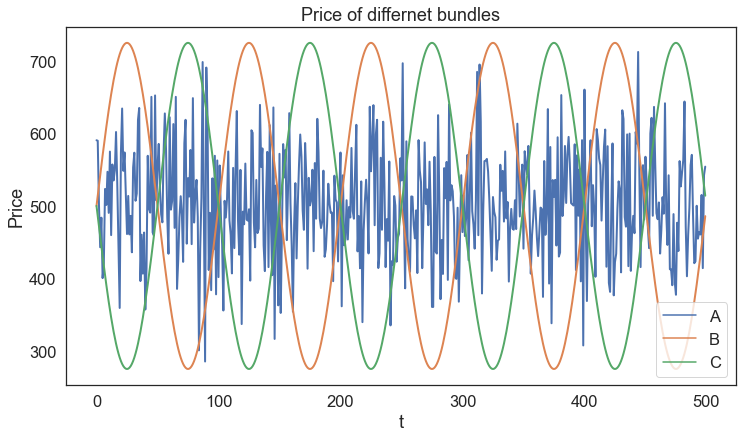

In [149]:
sns.set_theme(style="white", font_scale=1.5)
plt.figure(figsize=(12,6.6))
ax1 = sns.lineplot(x="t", y="cost", data=df, hue="group",linewidth=2)
ax1.set_title("Price of differnet bundles")
ax1.set_ylabel("Price")
ax1.legend().set_title(title=None)
ax1.figure.savefig("prices.png")

In [110]:
z=[]
for i in range(1000):
    costs=[cost(i), B(i), C(i)]
    z.append(chr(costs.index(min(costs))+97))
values, counts = np.unique(z, return_counts=True)
print(values, counts)

['a' 'b' 'c'] [ 87 465 448]


In [111]:
a=[]
cost_A, cost_B, cost_C, cost_optimal = 0, 0, 0, 0
for i in range(len(zz)):
    cost_A += zz[i][0]
    cost_B += zz[i][1]
    cost_C += zz[i][2]
    cost_optimal += np.min(zz[i])
    a.append({"t": i+1, "cost_min": cost_A, "group": "A"})
    a.append({"t": i+1, "cost_min": cost_B, "group": "B"})
    a.append({"t": i+1, "cost_min": cost_C, "group": "C"})
    a.append({"t": i+1, "cost_min": cost_optimal, "group": "optimal"})
df_costs=pd.DataFrame(a)

<AxesSubplot:xlabel='t', ylabel='cost_min'>

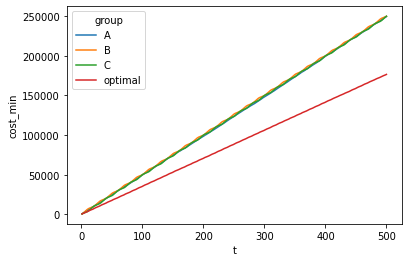

In [115]:
sns.lineplot(x="t", y="cost_min", data=df_costs, hue="group")

In [107]:
df_costs

,t,cost_min,group
0,1,406.623426,A
1,1,500.000000,B
2,1,500.000000,C
3,1,406.623426,optimal
4,2,917.312965,A
...,...,...,...
1995,499,175736.959066,optimal
1996,500,248469.222795,A
1997,500,250000.000000,B
1998,500,250000.000000,C
